IMPORTING LIBRARIES

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data

In [57]:
dataset=pd.read_csv('data.csv')

In [58]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [59]:
dataset=dataset.drop("date",1)
X=dataset.drop("price",1)
y=dataset["price"]

C:\Users\king\AppData\Local\Temp\ipykernel_2088\4183886404.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset=dataset.drop("date",1)
C:\Users\king\AppData\Local\Temp\ipykernel_2088\4183886404.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=dataset.drop("price",1)


In [60]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [72]:
X.describe

<bound method NDFrame.describe of       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  

Removing the null values

In [61]:
rows_with_null = X.isnull().any(axis=1)
dataset_cleaned = X.dropna()
print(dataset_cleaned.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.50         1340      7912     1.5           0     0   
1       5.0       2.50         3650      9050     2.0           0     4   
2       3.0       2.00         1930     11947     1.0           0     0   
3       3.0       2.25         2000      8030     1.0           0     0   
4       4.0       2.50         1940     10500     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3        1340              0      1955          2005   
1          5        3370            280      1921             0   
2          4        1930              0      1966             0   
3          4        1000           1000      1963             0   
4          4        1140            800      1976          1992   

                     street       city  statezip country  
0      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1           709 W Blaine St 

Splitting the data into training and testing data

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=1)

Applying Ordinal Encoding

In [63]:
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
object_cols

['street', 'city', 'statezip', 'country']

In [64]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

In [65]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2583,2.0,1.00,890,2100,1.0,0,0,4,760,130,1919,1985,2480.0,35.0,49.0,0.0
1947,4.0,2.75,3110,35235,2.0,0,0,4,3110,0,1983,0,1179.0,41.0,40.0,0.0
2159,4.0,2.25,3160,34560,1.0,0,0,4,3160,0,1981,0,724.0,41.0,40.0,0.0
4222,3.0,2.50,1460,3044,2.0,0,0,3,1460,0,2000,0,3058.0,35.0,50.0,0.0
2624,5.0,2.75,3010,12611,2.0,0,0,3,3010,0,1994,0,144.0,31.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,4.0,1.50,1220,9600,1.0,0,0,3,1220,0,1980,0,2560.0,7.0,10.0,0.0
2763,3.0,1.75,1970,8200,1.0,0,0,5,1420,550,1963,0,2550.0,36.0,69.0,0.0
905,3.0,2.50,1720,1916,2.0,0,0,3,1720,0,2005,0,2689.0,32.0,34.0,0.0
3980,4.0,3.25,4100,241322,2.0,0,0,3,2500,1600,1981,2013,1151.0,41.0,40.0,0.0


In [66]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1351,5.0,2.00,2330,10750,1.0,0,0,4,1190,1140,1962,0,-1.0,17.0,16.0,0.0
1687,3.0,2.50,2730,5832,2.0,0,0,3,2730,0,1998,2006,-1.0,3.0,4.0,0.0
1297,3.0,2.00,1220,1186,3.0,0,0,3,1220,0,2007,0,-1.0,35.0,46.0,0.0
2101,4.0,1.75,2700,7875,1.5,0,0,4,2700,0,1968,0,-1.0,32.0,36.0,0.0
3920,3.0,4.00,2080,2250,3.0,0,4,3,2080,0,1997,0,-1.0,35.0,46.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,4.0,1.00,2080,3500,1.5,0,0,5,1260,820,1926,0,-1.0,35.0,62.0,0.0
2215,2.0,1.00,1740,3622,1.0,0,0,4,950,790,1924,0,-1.0,35.0,56.0,0.0
3634,3.0,3.00,3790,5001,2.0,0,0,3,2810,980,1989,0,-1.0,35.0,58.0,0.0
3531,4.0,2.25,2300,7700,1.0,0,0,3,1380,920,1959,1989,-1.0,35.0,59.0,0.0


In [67]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

Training the model with Linear Regression

In [68]:
my_model=LinearRegression()
my_model.fit(X_train,y_train)
y_pred=my_model.predict(X_test)
mae=mean_absolute_error(y_pred,y_test)
print("Mean absolute error is:- ",mae)

Mean absolute error is:-  161101.24808901167


In [69]:
y_pred

array([ 502044.10371704,  675657.30993999,  298256.12951552,
        697363.27882787,  814287.46251945,  620624.88243765,
        265059.57470791,  308188.31415954,  411206.23704976,
        516482.69531318,  407870.51017982,  310082.94973218,
        362952.70975089,  751607.62848761,  290140.0838233 ,
        560293.99450112,  586726.86874771,  467782.99986339,
        479566.47259174,  555593.02910071,  353652.75236693,
        595682.22549011,  678522.54245128,  183840.04611038,
        588392.96650397,  657633.80308213,  287863.10233428,
        289219.24461134,  674018.72701902,  450645.1826256 ,
        501698.72682459,  897300.50169216,  276093.92842025,
        409906.42451213,  556740.46581163,  432263.92269731,
        185633.17288472,  466272.92697532,  675387.26269804,
        230539.98559824,  897143.77504562,  455936.79176172,
        773015.30798328,  518516.93659068,  455776.63406119,
        609671.23713049,  525985.79914181,  744429.52537816,
        422585.62459708,

Graphs

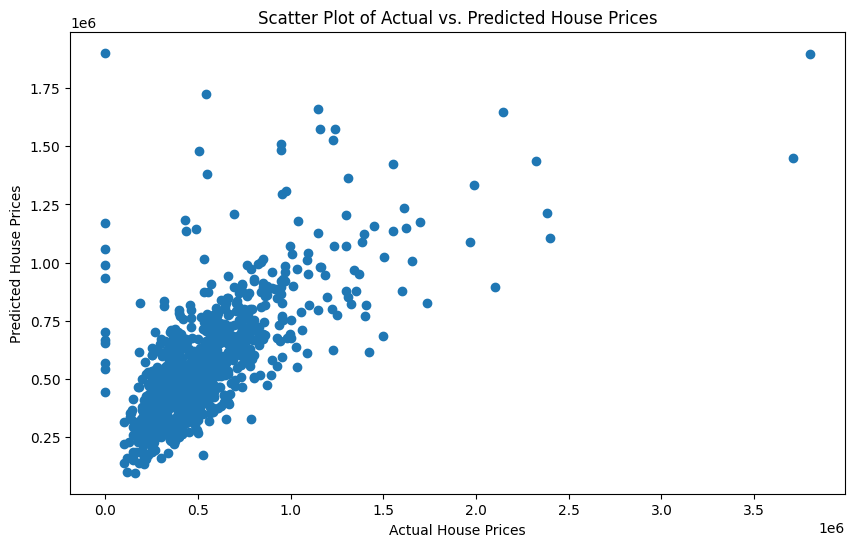

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title("Scatter Plot of Actual vs. Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()

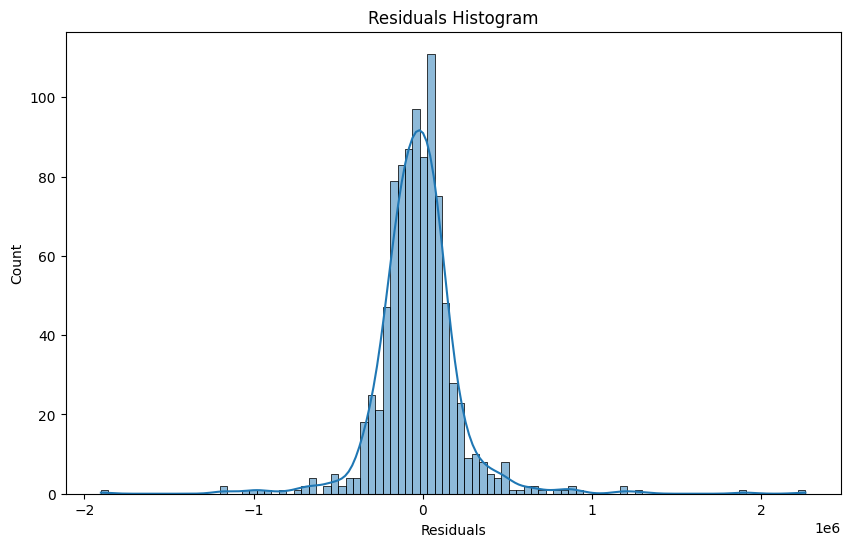

In [71]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.show()